# Estimacion de parametros usando $\chi^2$

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

1- A partir de la recta y=3x+2 generar 15 puntos y sociar un error relativo de aproximadamente 0.2. Graficar y guardar en un archivo.

In [19]:
a = 3
b = 2
n = 15
xor = np.linspace(0,2,15)
yor = a*xor + b
y=yor

error = np.random.normal(0,0.2, size=15)
yerror = []
for i in range(15):
    y[i] = y[i] + error[i]
    yerror.append(0.2)
for i in range(15):
    y[i] = y[i] + error[i]
    yerror.append(0.2)

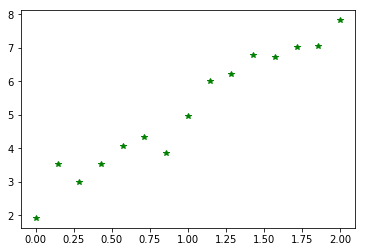

In [20]:
plt.plot(xor, yor, '*', c='green')

In [5]:
sigma = 0.2
error = np.random.uniform(low=-sigma, high=sigma, size=15)

In [6]:
ydat = yor + error

<function matplotlib.pyplot.show(*args, **kw)>

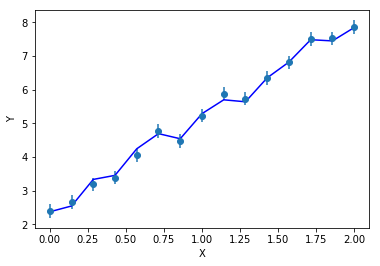

In [7]:
fig, ax = plt.subplots()
ax.errorbar(xor, ydat, yerr=sigma,fmt='o')
plt.plot(xor, yor, c='blue', label='ORIGINAL')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

In [8]:
aran = np.random.uniform(low=a - sigma, high=a + sigma, size=15)
bran = np.random.uniform(low=b - sigma, high=b + sigma, size=15)

In [9]:
len(xor)

15

2- Definir una funcion y = ax + b

In [10]:
# DATOS
def line(x, m, b):
    return(m*x + b)

In [16]:
def like(a, b, datos):
    x = datos[0]
    y = datos[1]
    error = datos[2] 
    modelo = line(x, a, b)
    like = (y-modelo)**2/(error**2)
    return like.sum()

3- GENERAR LAS MUESTRAS

In [18]:
a0, sigma_a0 = 2.9, 0.1
b0, sigma_b0 = 2.1, 0.1

like(a0, b0, [xor,y,yerror])

a_sample = sigma_a0 * np.random.randn(1000) + a0
b_sample = sigma_b0 * np.random.randn(1000) + b0


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

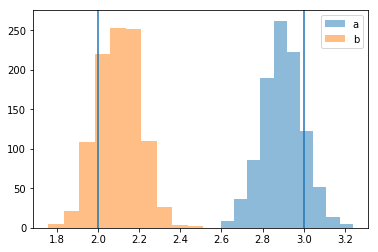

In [11]:
plt.hist(a_sample, alpha = 0.5, label = 'a')
plt.hist(b_sample, alpha = 0.5, label = 'b')
plt.axvline(a)
plt.axvline(b)
plt.legend()

In [12]:
def chisqr(theta, data):
    x = data[0]
    y = data[1]
    yerr = data[2]
    # Lo que sigue depende del modelo
    model = line(x, theta[0], theta[1])
    
    chisqr = (y-model) ** 2 / (yerr**2)
    return chisqr.sum()
    

In [13]:
def chisqr(theta, data):
    x = xor
    y = ydat
    yerr = sigma
    # Lo que sigue depende del modelo
    model = line(x, theta[0], theta[1])
    
    chisqr = (y-model) ** 2 / (yerr**2)
    return chisqr.sum()

In [14]:
chisqr_ = np.zeros_like(a_sample)
for i in range(len(a_sample)):
    chisqr_[i] = chisqr((a_sample[i], b_sample[i]), [ydat, xor, sigma])

In [15]:
mini = np.min(chisqr_)
a_best, b_best = a_sample[np.where(chisqr_==mini)],  b_sample[np.where(chisqr_==mini)]

In [16]:
a_best

array([2.90935345])

In [107]:
b_best

array([1.92897764])